B067 Khushi Shah

---

Experiment 10

**Aim:** To determine the motion vector for the given two frames of a video



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
vid = cv2.VideoCapture('bus_cif.y4m')

In [ ]:
images=[]

In [ ]:
while (vid.isOpened()):   
  ret,fr = vid.read()   #this line reads one frame at a time
  if ret == False:
    break
  images.append(fr)
vid.release()

In [ ]:
images = np.array(images)

In [ ]:
images = images[:,:,:,0]

In [ ]:
images.shape

(150, 288, 352)

In [ ]:
#150 here signifies the number of frames in the video

In [ ]:
def mini_diff(ref_frame, curr_blk):
  rows,cols = ref_frame.shape
  row_col = [] #empty matrix where we are storing row and col number of the matched blocks
  mse = []     #minimum square error 
  
  for r in range(0, rows//8):
    for c in range(0,cols//8):
      sub_blk = ref_frame[r*8:(r+1)*8, c*8: (c+1)*8]
      error = np.square(sub_blk - curr_blk).mean(axis=None)
      mse.append(error)
      row_col.append((r*8,c*8))
  mse = np.array(mse)
  row_col = np.array(row_col)
  min_mse = mse.min()
  matched = np.where(mse == min_mse)
  return min_mse, row_col[matched]

In [ ]:
ref_frame = images[50]
curr_frame = images[1]

Text(0.5, 1.0, 'Current Frame')

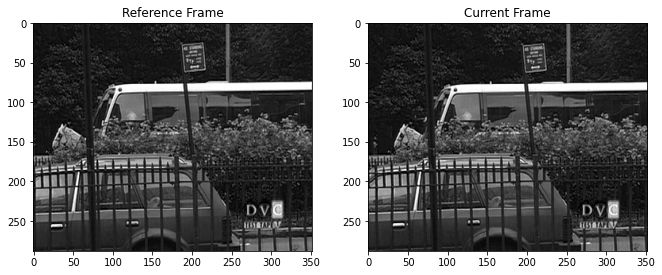

In [ ]:
plt.figure(figsize=(11,11))
plt.subplot(1,2,1)
plt.imshow(ref_frame, cmap = "gray")
plt.title("Reference Frame")
plt.subplot(1,2,2)
plt.imshow(curr_frame, cmap = "gray")
plt.title("Current Frame")

In [ ]:
r_c = 100 #row and column of the current block which we are choosing to compare with the ref block
c_c = 120
curr_blk = curr_frame[r_c: r_c + 8,c_c: c_c +8]

In [ ]:
min_sq_error, coord = mini_diff(ref_frame, curr_blk) #gives us the coordinate where we are getting the min error

In [ ]:
ref_frame.shape

(288, 352)

In [ ]:
min_sq_error

33.03125

In [ ]:
coord

array([[248, 104]])

In [ ]:
x = coord[0,0]
y =coord[0,1]
print(curr_blk)

[[114 116 121 121 117 116 118 118]
 [114 116 119 119 117 116 116 118]
 [116 117 117 116 116 117 117 117]
 [117 116 117 118 117 117 118 119]
 [117 117 117 118 116 115 118 119]
 [117 117 117 118 116 116 118 119]
 [114 114 117 117 115 115 119 119]
 [118 115 120 119 114 114 120 121]]


In [ ]:
print(ref_frame[x:x+8,y:y+8])


[[114 116 108 103 113 112 125  88]
 [115 118 111 106 117 115 121  86]
 [117 117 115 116 122 118 123  92]
 [118 118 116 116 122 117 123  94]
 [114 116 117 115 119 116 125  97]
 [111 116 118 116 119 116 126  99]
 [115 117 117 115 116 113 121  98]
 [112 117 115 108 110 108 115 105]]


In [ ]:
motion_vector = [x-r_c, y-c_c]
print('Motion Vector is: ', motion_vector)

Motion Vector is:  [148, -16]


**Conclusion:**

* For the given video, a macroblock in frame number 1 is matched with the blocks in frame 0. 
* The matching block is found at coordinates (96,120) with the min square error as 5.6875.
* If the same block is searched in frame no.50, then the min square error is larger than the error for frame 0. 
* It can be concluded that the matching blocks are searched in the first few consecutive frames only. 